# Alexnet 구현
논문 해석: https://naknaklee.github.io/classification/2020/04/22/AlexNet-Post-Review/

### 1. Abstract
배경 : 기존의 모델들은 복잡한 특성을 지닌 객체에 대한 분류 성능이 좋지 않았음. <br>
목적 : 복잡한 특성을 지닌 120만개의 이미지를 1000종류의 class로 분류하는 것. <br>

### 2. Introduction
But objects in realistic settings exhibit considerable variability, so to learn to recognize them it is necessary to use much larger training sets. <br> <br>
현실성이 반영된 객체는 상당한 가변성을 보이므로 이를 인식하려면 훨씬 더 큰 학습 데이터를 사용해야 함. <br>
<br>
<br>
-> It has only recently become possible to collect labeled datasets with millions of images. <br>
-> 최근에서야 수백만 개의 이미지로 레이블이 지정된 데이터 세트를 수집하는 것이 가능해짐. <br>
<br>
<br>
-> To learn about thousands of objects from millions of images, we need a model with a large learning capacity. <br>
-> 수백만 개 이미지를 받아들일 수 있을 정도의 학습 능력을 갖춘 모델이 필요함. <br>
<br>
<br>
-> However, the immense complexity of the object recognition task means that this problem cannot be specified even by a dataset as large as ImageNet, so our model should also have lots of prior knowledge to compensate for all the data we don’t have. <br>
-> 그러나 객체 인식 작업의 복잡성으로 인해 ImageNet만큼 큰 데이터 집합으로도 이 문제를 지정할 수 없으므로 모델로 하여금 모든 데이터를 보완 할 수 있는 사전 지식을 갖추도록 해야함. <br>
<br>
<br>
-> Convolutional neural networks (CNNs) constitute one such class of models. <br>
-> CNN(Convolutional Neural Networks)이 바로 그러한 종류의 모델을 구성함. <br>
<br>
<br>
-> Their capacity can be controlled by varying their depth and breadth, and they also make strong and mostly correct assumptions about the nature of images (namely, stationarity of statistics and locality of pixel dependencies). <br>
-> 깊이와 폭을 변경하여 모델의 크기를 제어 할 수 있으며, 이미지의 특성(즉, 통계의 정상성 및 픽셀의 지역성)에 대해 강력하고 대부분 정확한 가정을 함. <br>
※ 통계의 정상성 : 확률적인 성질들이 표본집합의 크기 및 복잡성에 영향을 받지 않고 불변하는 성질. <br>
※ 픽셀의 지역성 : 픽셀간의 위치 관계가 이미지 분류에 있어 중요한 기준이 됨. <br> 
<br>
<br>
-> Luckily, current GPUs, paired with a highly-optimized implementation of 2D convolution, are powerful enough to facilitate the training of interestingly-large CNNs, and recent datasets such as ImageNet contain enough labeled examples to train such models without severe overfitting. <br>
-> 다행히도, 현재의 GPU는 2D 컨볼루션의 최적화된 구현과 함께 규모가 큰 CNN의 훈련을 용이하게 할 만큼 강력하며, ImageNet과 같은 최근의 데이터 세트는 심한 과적합 없이 모델을 교육하기에 충분한 레이블이 있는 예제가 포함되어 있음. <br>
<br>
<br>
-> All of our experiments suggest that our results can be improved simply by waiting for faster GPUs and bigger datasets to become available. <br>
-> 더 빠른 GPU와 더 큰 데이터 세트를 사용할 수 있다면 모델의 성능을 개선할 수 있을 것으로 예상. <br>

### 3. The Architecture
parameters : 60,000,000 <br>
num of conv layers : 5 (max pooling) <br>
num of fully connected layers : 3 (final: 1000-way softmax) <br>

num of total layers : 8 <br>
why? GPU 메모리의 한계 (3GB) (GTX 580) <br>

학습속도를 높이기 위해 non-sturating neurons 사용 (ReLU) -> 효율적으로 GPU 연산 수행 <br>
fc에서 overfitting을 줄이기 위해 regularization(정규화)기법으로 dropout 사용 <br>

### 4. Details
#### 1. activation function
 - Sigmoid : Logistic 함수로 불리기도 하며, x의 값에 따라 0~1의 값을 출력하는 S자형 함수. 네트워크에 비선형성을 부여하지만 도함수 값이 0에 수렴하는 Gradient vanishing문제가 발생함.
$$
{f(x)} = {1 \over 1+e^{-x}}
$$

In [28]:
import numpy as np

def sigmoid(x: float) -> float:
    return 1.0 / (1.0 + np.exp(-x))

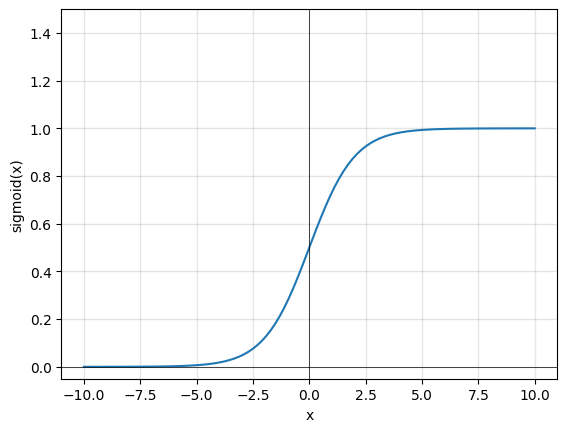

In [29]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))

plt.ylim((-0.05, 1.5))
plt.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")

plt.show()

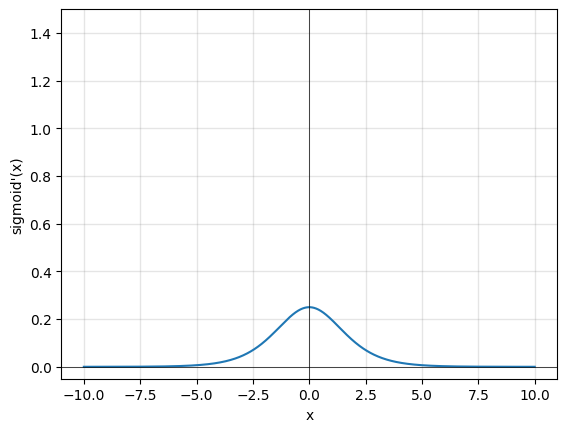

In [41]:
import matplotlib.pyplot as plt
import numpy as np

dx = x[1]-x[0]
dydx = np.gradient(sigmoid(x), dx)

x = np.linspace(-10, 10, 1000)
plt.plot(x, dydx)

plt.xlabel("x")
plt.ylabel("sigmoid'(x)")
plt.ylim((-0.05, 1.5))
plt.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)

plt.show()

 - ReLU (rectified linear unit) : 입력 값이 0보다 작으면 0을, 0보다 크면 입력 값 그대로 출력하는 함수. Sigmoid의 단점인 Gradient vanishing을 해결.
$$
{f(x)} = {max(0, x)}
$$

In [34]:
def relu(x):
	return np.maximum(0.0, x)

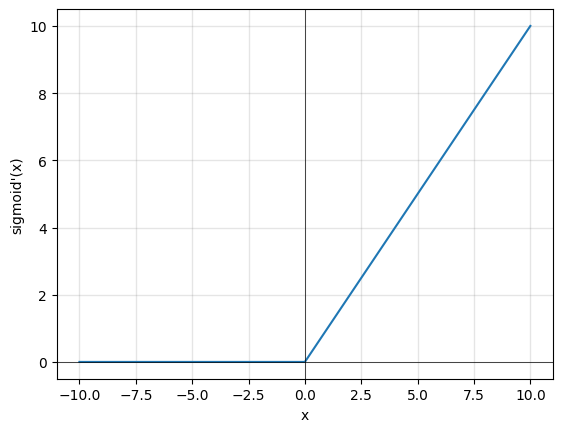

In [40]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 1000)
plt.plot(x, relu(x))

plt.xlabel("x")
plt.ylabel("sigmoid'(x)")
plt.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)

plt.show()

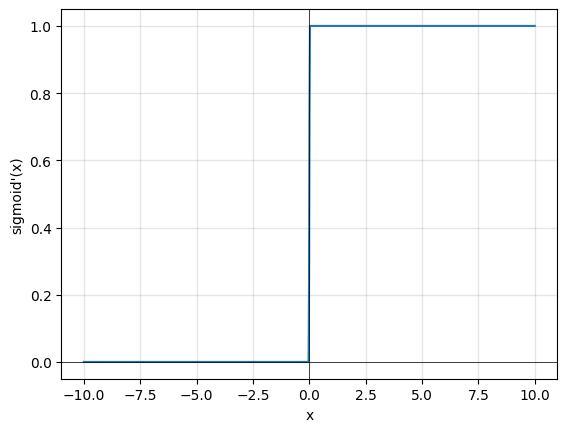

In [43]:
import matplotlib.pyplot as plt
import numpy as np

dx = x[1]-x[0]
dydx = np.gradient(relu(x), dx)

plt.plot(x, dydx)

plt.xlabel("x")
plt.ylabel("sigmoid'(x)")
plt.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)

plt.show()

 - Softmax: 다중 분류 모델의 출력값을 총합이 1인 확률값으로 변환하기 위하여 사용. 다중 입력에 대해 큰 입력일수록 더욱 높은 probability을 부여함.
$$
y_k = {exp(a_k)}/{\sum_{i=1}^{n}(exp(a_i))}
$$
![title](source_image/softmax.jpg)

##### 2. 2D Convolution


In [1]:
import numpy as np

np.random.random()

0.010272304295236179

imagePadded.strides : float64
imagePadded.strides : (16636832, 15376, 8)
(1080, 1920, 3)
(6, 1080, 1920)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)


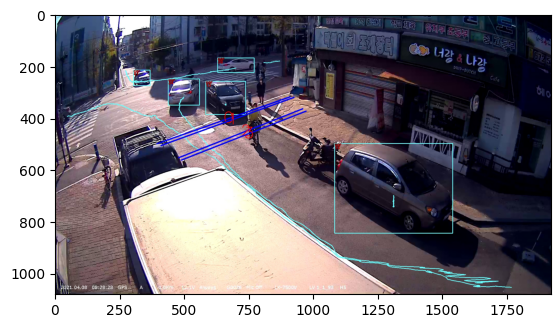

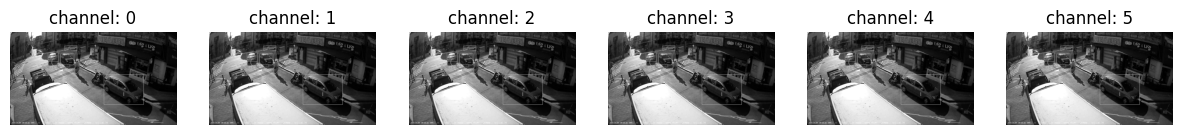

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy.typing import NDArray
from typing import Tuple
from pprint import pprint
from numpy.lib.stride_tricks import as_strided


def Conv2D(image: NDArray[np.uint8], out_channels: int, kernel_size: Tuple[int], padding: int=0, strides: int=1):
    '''
    input = (C, H, W)
    kernel_size = (k, k)
    ouptput = (out_channels, output_height, output_width)
    '''
    channel, image_height, image_width = image.shape
    kernel_height, kernel_width = kernel_size[0], kernel_size[1]
    kernel = np.random.random((channel, kernel_size[0], kernel_size[1]))
    
    output_height = int(((image_height - kernel_height + 2 * padding) / strides) + 1)
    output_width= int(((image_width - kernel_width + 2 * padding) / strides) + 1)
    
    output = np.zeros((out_channels, output_height, output_width))

    if padding != 0:
        imagePadded = np.zeros((channel, image_height + padding * 2, image_width + padding * 2))
        imagePadded[:, padding:(-padding), padding:(-padding)] = image
    else:
        imagePadded = image.copy()
    
    print("imagePadded.strides :", imagePadded.dtype)
    print("imagePadded.strides :", imagePadded.strides)
    # pprint("="*50)
    # pprint(f"padded image shape : {imagePadded.shape}")
    # pprint(np.round(imagePadded, 2))

    # convolution 2D
    for z in range(0, out_channels):
        # output_per_channel = np.zeros((output_height, output_width))
        
        # for y in range(0, output_height):
        #     if (y*strides + kernel_height) <= imagePadded.shape[1]:

        #         for x in range(0, output_width):                
        #             if (x*strides + kernel_width) <= imagePadded.shape[2]:
        #                 output_per_channel[y][x] = np.sum(imagePadded[:,
        #                                                        y*strides : y*strides + kernel_height,
        #                                                        x*strides : x*strides + kernel_width] * kernel).astype(np.float32)
        
        window_shape = (kernel_height, kernel_width)
        _shape = (channel,
                  (imagePadded.shape[1] - kernel_height) // strides + 1, # output shape의 height 만큼
                  (imagePadded.shape[2] - kernel_width) // strides + 1, # output shape의 width 만큼
                  *window_shape)
        print("_shape :", _shape)
        _stride = (imagePadded.strides[0],
                   imagePadded.strides[1] * strides,
                   imagePadded.strides[2] * strides,
                   *imagePadded.strides[1:])
        print("_stride :", _stride)
        window_view = as_strided(imagePadded,
                                 shape=_shape,
                                 strides=_stride)

        output_per_channel = np.tensordot(window_view, kernel, axes=((0,3,4),(0,1,2)))
        output[z, :, :] = output_per_channel
    
    # pprint("="*50)
    # pprint(f"output image shape : {output.shape}")
    # pprint(output)
    # pprint("="*50)

    return output

IMAGE_PATH = "source_image/2번카메라.jpg"
OUTPUT_CHANNELS = 6
KERNEL_SIZE = (3, 3)
PADDING = 1
STRIDE = 1

raw_image = Image.open(IMAGE_PATH)
raw_image = np.array(raw_image)
image = raw_image.transpose((2, 0, 1))
for i in range(0, 1):
    output = Conv2D(image, out_channels=OUTPUT_CHANNELS, kernel_size=KERNEL_SIZE, padding=PADDING, strides=STRIDE)
print(raw_image.shape)
print(output.shape)

plt.imshow(raw_image)
plt.figure(figsize=(15, 90))
for channel_i, channel in enumerate(output):
    channel = np.expand_dims(channel, axis=0).astype(int)
    channel = np.transpose(channel, (1,2,0))
    channel_scaled = channel * (255.0/channel.max())
    channel_scaled = channel_scaled.astype(int)
    print(channel_scaled.shape)
    plt.subplot(1, OUTPUT_CHANNELS, channel_i+1)
    plt.axis('off')
    plt.title(f"channel: {channel_i}")
    plt.imshow(channel_scaled, cmap='gray', vmin=0, vmax=255)

((1920+2) * 8 * (1080+2), 1920+2 * 8 = 15376, 8)

### numpy.lib.stride_tricks.as_strided
Array의 Memory Layout을 변경하지 않고 Shape과 Stride를 변경하는 함수. <br>
주어진 Array의 데이터 버퍼를 사용하여 새로운 ndarray 객체를 생성함. <br>
입력 이미지의 Sliding window view를 생성하는 데에 주로 사용됨. <br>

##### Memory Layout
컴퓨터 메모리에서 데이터가 저장되는 방식. <br>
Array는 각 요소가 메모리에 연속적으로 저장됨. <br>
다차원 Array의 경우 각 차원의 요소가 메모리에 어떻게 저장되는지는 Array의 Stride에 따라 달라짐.<br>

##### Sliding window view
커널 크기와 동일한 모양의 window가 입력 이미지를 따라 이동하면서 각 위치에서의 값을 포함하는 view를 생성함. <br>
이렇게 생성된 view는 convolution 연산에 사용됨. <br>

##### Stride
각 차원에서 인접한 요소 사이의 메모리 주소값의 간격을 나타내는 값. <br>
예를 들어, 2D Array의 경우 Row Stride는 같은 열의 인접한 행 사이의 메모리 간격을 나타내고, Column Stride는 같은 행의 인접한 열 사이의 메모리 간격을 나타냄. <br>
Array의 차원이 커질수록 Stride의 종류도 정비례하여 늘어남 (ex. 3D Array는 Row, Column, Depth의 세 종류.) <br>
※ numpy.ndarray.strides : 이하 셀 참조


##### 주의사항
잘못된 Shape이나 Stride가 지정되면 메모리 오류가 발생함.<br>

In [9]:
import numpy as np

x = np.random.randint(100, size=(4, 3, 2, 5), dtype="int32")

print(x.size)
print(x.dtype)
print(x.shape)
print(x.strides) 
# x.shape : (4, 3, 2, 5)
# dtype이 int32이므로 한 요소당 4바이트를 차지하므로 
# axis=0 방향으로 한 칸 이동하려면 4바이트를 이동해야 함.
# aixs=1 방향으로 한 칸 이동하려면 x.shape[-1]=5이므로 4*5= 20바이트를 이동해야 함. 
# aixs=2 방향으로 한 칸 이동하려면 x.shape[-2]=2이므로 4*5*2= 40바이트를 이동해야 함. 
# aixs=3 방향으로 한 칸 이동하려면 x.shape[-3]=3이므로 4*5*2*3= 120바이트를 이동해야 함. 

120
int32
(4, 3, 2, 5)
(120, 40, 20, 4)


In [8]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

a = np.arange(6)
b = as_strided(a, shape=(3, 2), strides=(9, 4))

print("a.dtype:", a.dtype)
print("a.shape:", a.shape)
print("a.strides:", a.strides)
print(a)

print("\nb.dtype:", b.dtype)
print("b.shape:", b.shape)
print("b.strides:", b.strides)
print(b)

print("\n")
print("*"*50)
print("\n")

a = np.arange(6)
b = as_strided(a, shape=(5, 2), strides=(4, 4))

print("a.dtype:", a.dtype)
print("a.shape:", a.shape)
print("a.strides:", a.strides)
print(a)

print("\nb.dtype:", b.dtype)
print("b.shape:", b.shape)
print("b.strides:", b.strides)
print(b)

print("\n")
print("*"*50)
print("\n")

a = np.random.randint(255, size=(3, 1080, 1920), dtype=np.uint8)
b = as_strided(a, shape=(3, 1080, 1920, 3, 3), strides=(1080*1920*8, 1920*8, 8, 1920*8, 8))

print("a.dtype:", a.dtype)
print("a.shape:", a.shape)
print("a.strides:", a.strides)
print(a[0, :6, :6])

print("\nb.dtype:", b.dtype)
print("b.shape:", b.shape)
print("b.strides:", b.strides)
print(b[0, 0, 0, :])

a.dtype: int32
a.shape: (6,)
a.strides: (4,)
[0 1 2 3 4 5]

b.dtype: int32
b.shape: (3, 2)
b.strides: (9, 4)
[[        0         1]
 [ 50331648  67108864]
 [   327680 338362368]]


**************************************************


a.dtype: int32
a.shape: (6,)
a.strides: (4,)
[0 1 2 3 4 5]

b.dtype: int32
b.shape: (5, 2)
b.strides: (4, 4)
[[0 1]
 [1 2]
 [2 3]
 [3 4]
 [4 5]]


**************************************************


a.dtype: uint8
a.shape: (3, 1080, 1920)
a.strides: (2073600, 1920, 1)
[[ 68 104 170 128 179 133]
 [235  70  52 138 220  58]
 [247 184 108 134 114  82]
 [205 151  92 222  91 213]
 [ 14  66  38 254 153   0]
 [122 210 175  41  20  31]]

b.dtype: uint8
b.shape: (3, 1080, 1920, 3, 3)
b.strides: (16588800, 15360, 8, 15360, 8)
[[ 68 246 241]
 [ 48 167  10]
 [137  95  24]]


In [3]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

B1 = np.array([1, 2, 3])
B3 = np.array([[1], [2], [3], [4]])
B4 = np.array([[1, 2, 3]])

print("A + B1:")
print(A + B1)

print("A + B3:")
print(A + B3)

print("A + B4:")
print(A + B4)

A + B1:
[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]
 [11 13 15]]
A + B3:
[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]
 [14 15 16]]
A + B4:
[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]
 [11 13 15]]


##### 3. BatchNormalization


$$
\mu_B = \frac{1}{m} \sum_{i=1}^{m} x_i
$$

$$
\sigma_B^2 = \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_B)^2
$$

$$
\hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
$$

$$
y_i = \gamma \hat{x}_i + \beta
$$

$m$: mini batch의 크기<br>
$x_i$: mini batch의 입력값<br>
$\mu_B$: mini batch의 평균<br>
$\sigma_B^2$: mini batch의 분산<br><br>
$\hat{x}_i$: 정규화된 입력값<br>
$\gamma$, $\beta$: 학습 가능한 파라미터<br>
$y_i$: 최종 출력값<br>
$\epsilon$: 작은 상수로 분모가 0이 되는 것을 방지하기 위함<br><br>




We trained our models using stochastic gradient descent with a batch size of 128 examples, momentum of 0.9, and weight decay of 0.0005.<br> 
We found that this small amount of weight decay was important for the model to learn. <br>
In other words, weight decay here is not merely a regularizer: it reduces the model’s training error.<br><br>

확률적 경사 하강법을 사용하여 배치 크기가 128개의 예제, 모멘텀이 0.9이고 가중치 감소가 0.0005인 모델을 학습함. <br>
0.0005의 작은 양의 가중치 감소가 모델의 학습에 중요한 것으로 밝혀짐.<br>
즉, 여기서 가중치 감소는 단순한 정규화가 아니고 모델의 학습 오차를 줄임. (=accuracy 향상)<br><br>

※ 가중치 감소(weight decay)는 딥러닝 모델의 학습에서 일반적으로 사용되는 정규화(regularization) 기법 중 하나임.<br>
모델의 가중치가 너무 커지지 않도록 제한하여 과적합(overfitting)을 방지하는 역할을 함.<br>
AlexNet에서는 가중치 감소가 단순한 정규화가 아니라 모델의 훈련 오차를 줄이는 데 중요한 역할을 한다고 함.<br><br>


We initialized the weights in each layer from a zero-mean Gaussian distribution with standard deviation 0.01.<br>
We initialized the neuron biases in the second, fourth, and fifth convolutional layers, as well as in the fully-connected hidden layers, with the constant 1. <br>
This initialization accelerates the early stages of learning by providing the ReLUs with positive inputs. <br>
We initialized the neuron biases in the remaining layers with the constant 0.<br>
We used an equal learning rate for all layers, which we adjusted manually throughout training.<br>
The heuristic which we followed was to divide the learning rate by 10 when the validation error rate stopped improving with the current learning rate. <br>
The learning rate was initialized at 0.01 and reduced three times prior to termination. <br>
We trained the network for roughly 90 cycles through the training set of 1.2 million images, which took five to six days on two NVIDIA GTX 580 3GB GPUs.<br><br>

각 layer의 가중치는 표준 편차가 0.01인 0 평균 가우시안 분포에서 초기화.<br> 
2,4,5번째 2dConv과 FC Layer의 bias는 상수 1로 초기화했고, 그에 따라 ReLU에 양의 입력이 들어가게 되며 학습 초기 단계를 가속화. <br>
나머지 layer의 bias는 상수 0으로 초기화.<br>
모든 layer에 대해 동일한 learning rate을 사용하고, 학습 중에 수동으로 조정.<br>
Alexnet에서 사용한 Heuristic은 valid loss가 현재 learning rate로 개선되지 않을 때 learning rate를 10으로 나누는 것이었음.<br>
learning rate은 0.01로 초기화되었고 종료 전 세 번 감소됨.<br>
120만 개의 이미지로 구성된 학습 데이터를 대략 90회 반복하여 모델을 학습시켰으며, 이는 두 개의 NVIDIA GTX 580 3GB GPU에서 5~6일이 걸림.<br>

##### 4. Overlapping Pooling

Pooling layers in CNNs summarize the outputs of neighboring groups of neurons in the same kernel map. <br>
Traditionally, the neighborhoods summarized by adjacent pooling units do not overlap. <br>
To be more precise, a pooling layer can be thought of as consisting of a grid of pooling units spaced s pixels apart, each summarizing a neighborhood of size z * z centered at the location of the pooling unit. <br>
If we set s = z, we obtain traditional local pooling as commonly employed in CNNs.<br>
If we set s < z, we obtain overlapping pooling.<br>
This is what we use throughout our network, with s = 2 and z = 3.<br> 
This scheme reduces the top-1 and top-5 error rates by 0.4% and 0.3%, respectively, as compared with the non-overlapping scheme s = 2; z = 2, which produces output of equivalent dimensions. <br>
We generally observe during training that models with overlapping pooling find it slightly more difficult to overfit.<br>

Pooling Layer는 kernel의 범위에(=일반적으로 3*3크기) 속해있는 인접한 neuron 그룹의 output값을 요약하여 나타내는 역할을 함.(일반적으로 Max또는 Average)<br>
지금까지는 각 neuron 그룹의 영역은 서로 겹치지 않도록 하는 것이 관습이었음. (= stride=kernel_size) <br>
그러나 저자는 stride<kernel_size로 설정한 Overlapping Pooling을 사용함. (stride=2, kernel_size=3) <br>
그 결과, stride=2, kernel_size=2의 경우보다 top-1 및 top-5 error rate을 각각 0.4% 및 0.3% 감소시킴. <br>
저자는 일반적으로 학습 중 Overlapping Pooling이 있다면 과적합이 덜 되는 경향이 있는 것을 관찰함.

In [6]:
import numpy as np
from numpy.typing import NDArray
from skimage.util import view_as_windows

def max_pooling(input_array: NDArray, k: int) -> NDArray:
    """
    input_array : input feature map
    k : kernel size
    """
    print("========== Max Pooling ==========")
    output_array = view_as_windows(input_array, (k, k)).max(axis=(2,3))
    return output_array


def avg_pooling(input_array: NDArray, k: int) -> NDArray:
    """
    input_array : input feature map
    k : kernel size
    """
    print("========== Average Pooling ==========")
    output_array = view_as_windows(input_array, (k, k)).mean(axis=(2,3))
    return output_array


input_array = np.array([[ 1,  2,  3,  4,  5], 
                        [ 6,  7,  8,  9, 10], 
                        [11, 12, 13, 14, 15], 
                        [16, 17, 18, 19, 20], 
                        [21, 22, 23, 24, 25]])
print(max_pooling(input_array, 3))
print(avg_pooling(input_array, 3))

========== Max Pooling ==========
[[13 14 15]
 [18 19 20]
 [23 24 25]]
========== Average Pooling ==========
[[ 7.  8.  9.]
 [12. 13. 14.]
 [17. 18. 19.]]


##### extra1. Why is kernel size always odd number in convolution layer? <br>


1. Convolution Layer에서 feature 추출은 하되 feature map size는 유지하고 싶을 때 input size = output size로 두게 됨. <br>
이를 위해 convolution layer에 same_padding 옵션을 주어야 함. keras에선 tf.keras.layers.Conv2D(..., padding='same')으로 해당 옵션을 줌. <br>
이 때 사용하는 공식은 아래와 같이 유도됨.(stride=1로 고정) <br>
<br>
<!-- <div style="text-align: center"> -->
    
Given:
$$
out = in - k + 1 + (2 * p) \\
$$

If $out = in$, then:
$$
in = in - k + 1 + (2 * p) \\
\implies k - 1 = 2p \\
\implies p = \frac{k - 1}{2} \\
$$
Where,<br>
- out: output size<br>
- in: input size<br>
- k: kernel size<br>
- p: padding size<br>

<!-- </div> -->
2. 위의 same_padding 공식의 k에 짝수를 대입하면 padding size가 int가 아닌 float이 되어 same_padding이 불가능해짐. <br>
3. [kerenl의 중심점이 존재하지 않아 receptive capa에 악영향..?](https://medium.com/geekculture/why-is-odd-sized-kernel-preferred-over-even-sized-kernel-a767e47b1d77) (느낌은 알 것 같은데 확 와닿지는 않습니다 ㅠ)<br>



In [18]:
ADD = 1
# ADD : 0 짝수
# ADD : 1 홀수

for kernel_size in range(2+ADD, 100+ADD, 2):
    padding = (kernel_size + 1)/2
    print(padding)

2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0


##### extra2. Why is the kernel size mostly 3 in convolution layer? <br>

1. 여러번의 3*3 kernel Conv layer를 거치면 Receptive field는 동일하게 가져가고 parameter 수는 줄일 수 있음. <br>
ex. <br>
7×7 kernel layer 한 개일 때 parameter 수: (7 × 7 × in_channels + 1) × out_channels = 444 <br>
3×3 kernel layer 세 개일 때 parameter 수: (3 × 3 × in_channels + 1) × out_channels × 3 = 252  <br>

In [23]:
# KERNEL_SIZE = 3
# FMAP_HEIGHT = 9
# FMAP_WIDTH = 9
# STRIDE = 1

KERNEL_SIZE = 3
FMAP_HEIGHT = 9
FMAP_WIDTH = 9
STRIDE = 1


PADDING = 0
INPUT_CHANNELS = 3
OUTPUT_CHANNELS = 3



def calc_num_of_operations(fmap_height, fmap_width):
    output_fmap_height = (fmap_height + 2 * PADDING - KERNEL_SIZE) / STRIDE + 1 
    output_fmap_width = (fmap_width + 2 * PADDING - KERNEL_SIZE) / STRIDE + 1 
    number_of_operations = output_fmap_height * output_fmap_width * KERNEL_SIZE * KERNEL_SIZE * INPUT_CHANNELS * OUTPUT_CHANNELS
    number_of_parameters = (KERNEL_SIZE * KERNEL_SIZE * INPUT_CHANNELS + 1) * OUTPUT_CHANNELS
    print("output_height:", output_fmap_height)
    print("output_width:", output_fmap_width)
    print("number_of_operations:", number_of_operations)
    print("number_of_parameters:", number_of_parameters)
    return output_fmap_height, output_fmap_width, number_of_operations, number_of_parameters

total_number_of_operations = 0
total_number_of_parameters = 0

output_fmap_height = FMAP_HEIGHT
output_fmap_width = FMAP_WIDTH

while output_fmap_height > KERNEL_SIZE and output_fmap_width > KERNEL_SIZE:
    output_fmap_height, output_fmap_width, number_of_operations, number_of_parameters = calc_num_of_operations(output_fmap_height, output_fmap_width)
    total_number_of_operations += number_of_operations
    total_number_of_parameters += number_of_parameters

print("\nkernel_size:", KERNEL_SIZE)
print("total_number_of_operations:", total_number_of_operations)
print("total_number_of_parameters:", total_number_of_parameters)

output_height: 7.0
output_width: 7.0
number_of_operations: 3969.0
number_of_parameters: 84
output_height: 5.0
output_width: 5.0
number_of_operations: 2025.0
number_of_parameters: 84
output_height: 3.0
output_width: 3.0
number_of_operations: 729.0
number_of_parameters: 84

kernel_size: 3
total_number_of_operations: 6723.0
total_number_of_parameters: 252


##### 5. Flatten


##### 6. Dense with activation func(Fully Connected Layer)


##### 7. Dropout
중요

##### 8. Cost func (sparse_categorical_crossentropy)


##### 9. Opimizer (SGD)


But objects in realistic settings exhibit considerable variability, so to learn to recognize them it is necessary to use much larger training sets.

In [1]:
import tensorflow as tf
import keras.layers as layers
from keras.models import Sequential

class AlexNet(Sequential):
    def __init__(self):
        super().__init__()
        self.add(layers.Conv2D(filters=96, kernel_size=(11, 11), 
                                strides=(4, 4), activation="relu", 
                                input_shape=(227, 227, 3)))
        self.add(layers.BatchNormalization())
        self.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
        self.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                                strides=(1, 1), activation="relu", 
                                padding="same"))
        self.add(layers.BatchNormalization())
        self.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
        self.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                                strides=(1, 1), activation="relu", 
                                padding="same"))
        self.add(layers.BatchNormalization())
        self.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                                strides=(1, 1), activation="relu", 
                                padding="same"))
        self.add(layers.BatchNormalization())
        self.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                                strides=(1, 1), activation="relu", 
                                padding="same"))
        self.add(layers.BatchNormalization())
        self.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
        self.add(layers.Flatten())
        self.add(layers.Dense(4096, activation="relu"))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(10, activation="softmax"))
        self.compile(loss='sparse_categorical_crossentropy', 
                    optimizer=tf.optimizers.SGD(lr=0.001), 
                    metrics=['accuracy'])

In [2]:
model = AlexNet()
model.summary()

Model: "alex_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                          